In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Initial setup and exploration

In [2]:
train_df = pd.read_csv('train.csv')
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Removing Name and Ticket columns

In [4]:
train_df.drop(['Name', 'Ticket'], axis=1, inplace=True)

### Cabin will be changed to 0 or 1

If a passenger was assigned to a cabin, they are given a value of True, if they were not assigned a cabin, they are given a value of False

The .notnull() method returns True or False for each item, depending on whether the value in the column is not null(True) or null(False)

The .astype('int') changes the boolean values to integer values- True becomes 1 and False becomes 0.

In [5]:
train_df['Cabin'] = train_df['Cabin'].notnull().astype('int')

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Cabin        891 non-null    int32  
 9   Embarked     889 non-null    object 
dtypes: float64(2), int32(1), int64(5), object(2)
memory usage: 66.3+ KB


In [6]:
train_df['Cabin'].describe()

count    891.000000
mean       0.228956
std        0.420397
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Cabin, dtype: float64

## Looking at the numerical attributes

In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.228956
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.420397
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


Fare appears skewed- there seems to be a relatively large difference between the mean and the median (50%).

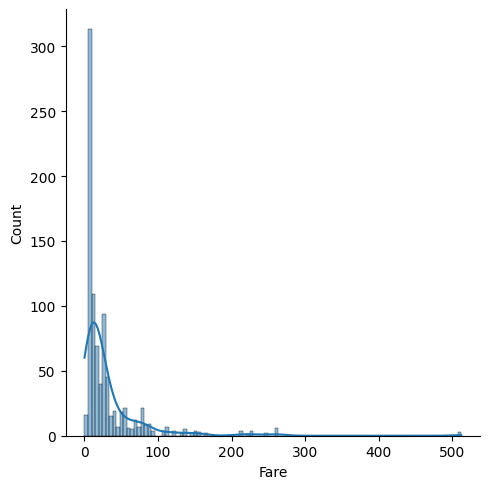

In [8]:
sns.displot(data=train_df, x=train_df['Fare'], kde=True)

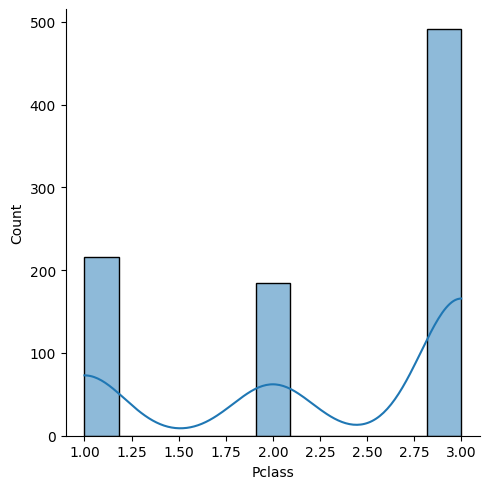

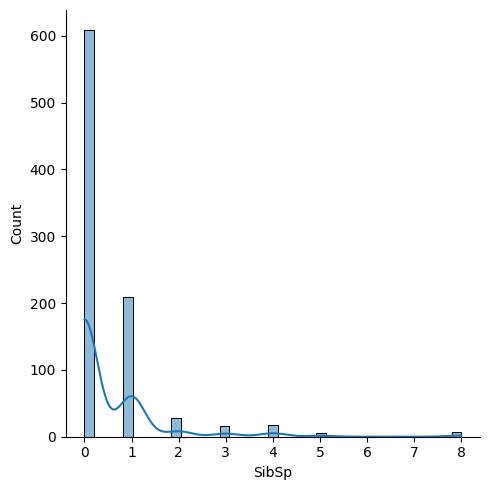

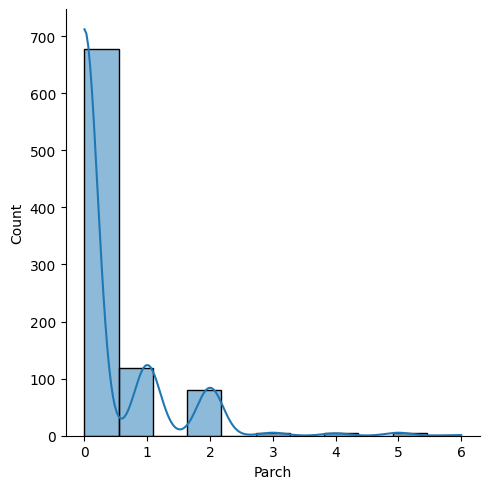

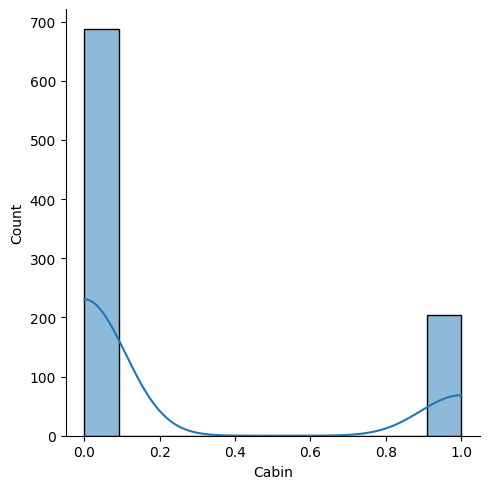

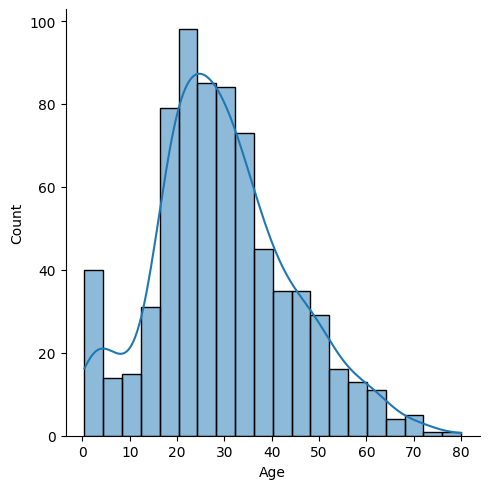

In [9]:
for i in ['Pclass', 'SibSp', 'Parch', 'Cabin', 'Age']:
    sns.displot(data=train_df, x=train_df[i], kde=True)

Age seems slightly skewed- the median is 40, yet the peak in the graphh is at about 30

### Using get_dummies() to apply one-hot encoding to the categorical attributes that do not already use numeric values

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Cabin        891 non-null    int32  
 9   Embarked     889 non-null    object 
dtypes: float64(2), int32(1), int64(5), object(2)
memory usage: 66.3+ KB


In [11]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.228956
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.420397
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


The two categorical attributes are Sex and Emabrked

In [12]:
train_df['Sex'].describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

In [13]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [14]:
train_df = pd.get_dummies(train_df, columns=['Sex'], drop_first=True, dtype='int')

Using drop_first means that only one Sex column is created instead of two.  Specifying dtype as int means that the resulting columns will be integers rather than boolean.

In [15]:
train_df = pd.get_dummies(train_df, columns=['Embarked'], drop_first=False, dummy_na=False, dtype='int')

Using drop_first=False means that there will be a column created for each port.  Setting dummy_na=False means that any NaN values will be ignored (we don't want an additional column for NaN values)

In [16]:
train_df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,888,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,889,0,3,NaN,1,2,23.4500,0,0,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,1,1,0,0


### Looking at the distribution of Age to deal with missing values

In [17]:
train_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

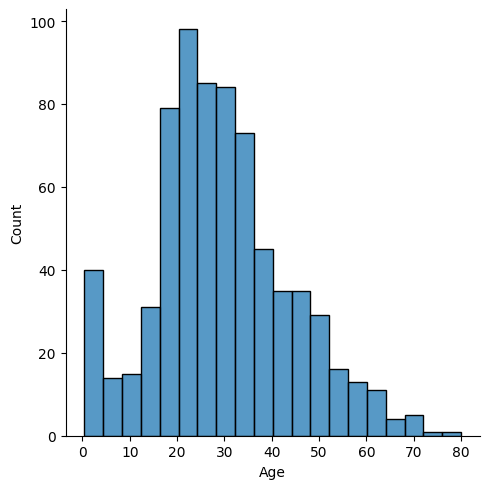

In [18]:
sns.displot(data=train_df, x='Age')

### Viewing other characteristics for people with no recorded age

I wanted to do this to see whether there appears to be any similarilties between these people

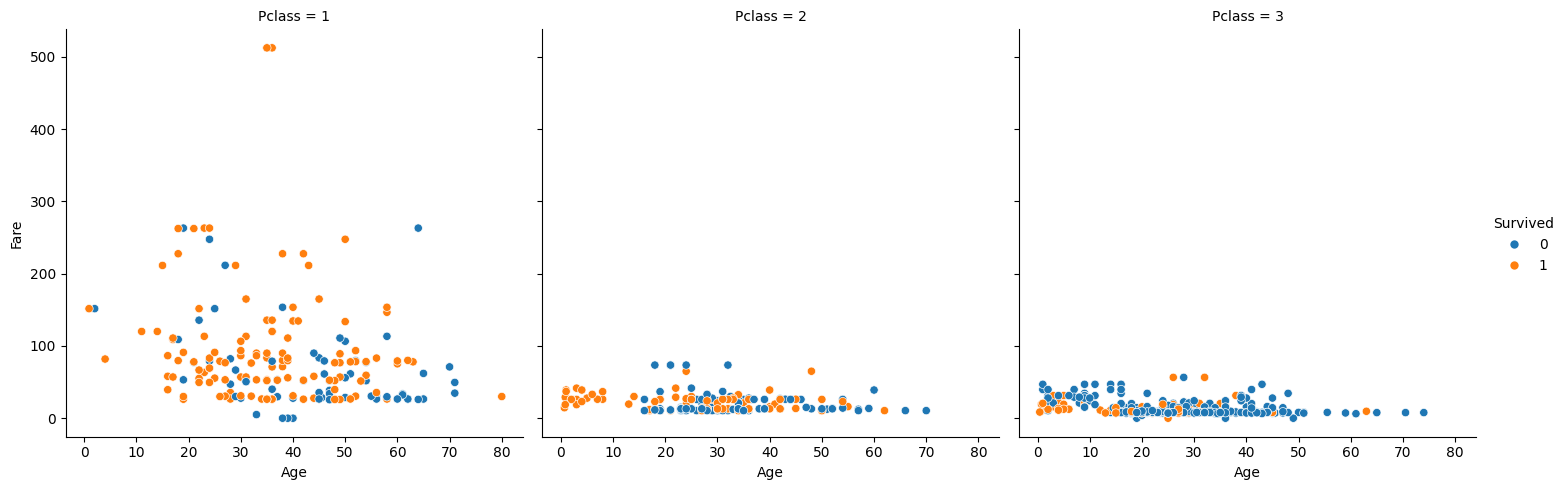

In [19]:
sns.relplot(data=train_df, x='Age', y='Fare', kind='scatter', hue='Survived', col='Pclass')

In [20]:
no_age = train_df[train_df['Age'].isnull()]

In [21]:
no_age

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_male,Embarked_C,Embarked_Q,Embarked_S
5,6,0,3,NaN,0,0,8.4583,0,1,0,1,0
17,18,1,2,NaN,0,0,13.0000,0,1,0,0,1
19,20,1,3,NaN,0,0,7.2250,0,0,1,0,0
26,27,0,3,NaN,0,0,7.2250,0,1,1,0,0
28,29,1,3,NaN,0,0,7.8792,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,NaN,0,0,7.2292,0,1,1,0,0
863,864,0,3,NaN,8,2,69.5500,0,0,0,0,1
868,869,0,3,NaN,0,0,9.5000,0,1,0,0,1
878,879,0,3,NaN,0,0,7.8958,0,1,0,0,1


In [22]:
no_age.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,177.000000,177.000000,177.000000,0.0,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,435.581921,0.293785,2.598870,NaN,0.564972,0.180791,22.158567,0.107345,0.700565,0.214689,0.276836,0.508475
std,250.552901,0.456787,0.763216,NaN,1.626316,0.534145,31.874608,0.310429,0.459310,0.411771,0.448704,0.501346
min,6.000000,0.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,230.000000,0.000000,3.000000,NaN,0.000000,0.000000,7.750000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,452.000000,0.000000,3.000000,NaN,0.000000,0.000000,8.050000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,634.000000,1.000000,3.000000,NaN,0.000000,0.000000,24.150000,0.000000,1.000000,0.000000,1.000000,1.000000
max,889.000000,1.000000,3.000000,NaN,8.000000,2.000000,227.525000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='Pclass', ylabel='Count'>

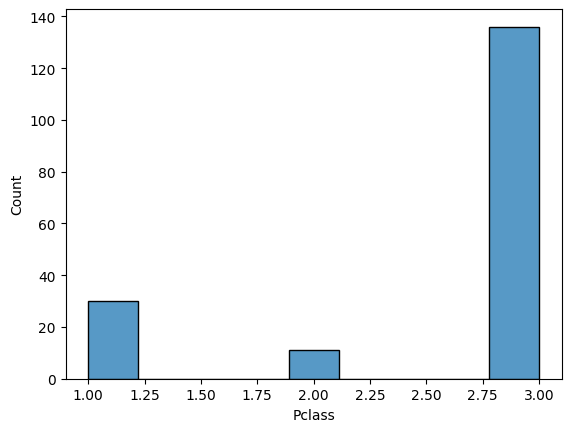

In [23]:
sns.histplot(x=no_age['Pclass'])

In [24]:
no_age_pclass_3 = no_age[no_age['Pclass'] == 3]
no_age_pclass_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136 entries, 5 to 888
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  136 non-null    int64  
 1   Survived     136 non-null    int64  
 2   Pclass       136 non-null    int64  
 3   Age          0 non-null      float64
 4   SibSp        136 non-null    int64  
 5   Parch        136 non-null    int64  
 6   Fare         136 non-null    float64
 7   Cabin        136 non-null    int32  
 8   Sex_male     136 non-null    int32  
 9   Embarked_C   136 non-null    int32  
 10  Embarked_Q   136 non-null    int32  
 11  Embarked_S   136 non-null    int32  
dtypes: float64(2), int32(5), int64(5)
memory usage: 11.2 KB


136 passengers

In [25]:
no_age_pclass_2 = no_age[no_age['Pclass'] == 2]
no_age_pclass_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 17 to 732
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  11 non-null     int64  
 1   Survived     11 non-null     int64  
 2   Pclass       11 non-null     int64  
 3   Age          0 non-null      float64
 4   SibSp        11 non-null     int64  
 5   Parch        11 non-null     int64  
 6   Fare         11 non-null     float64
 7   Cabin        11 non-null     int32  
 8   Sex_male     11 non-null     int32  
 9   Embarked_C   11 non-null     int32  
 10  Embarked_Q   11 non-null     int32  
 11  Embarked_S   11 non-null     int32  
dtypes: float64(2), int32(5), int64(5)
memory usage: 924.0 bytes


11 passengers

In [26]:
no_age_pclass_1 = no_age[no_age['Pclass'] == 1]
no_age_pclass_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 31 to 849
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  30 non-null     int64  
 1   Survived     30 non-null     int64  
 2   Pclass       30 non-null     int64  
 3   Age          0 non-null      float64
 4   SibSp        30 non-null     int64  
 5   Parch        30 non-null     int64  
 6   Fare         30 non-null     float64
 7   Cabin        30 non-null     int32  
 8   Sex_male     30 non-null     int32  
 9   Embarked_C   30 non-null     int32  
 10  Embarked_Q   30 non-null     int32  
 11  Embarked_S   30 non-null     int32  
dtypes: float64(2), int32(5), int64(5)
memory usage: 2.5 KB


30 passengers

### Finding the average age of 3rd class passengers

In [27]:
pclass_3 = train_df[train_df['Pclass'] == 3]

In [28]:
pclass_3.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,491.000000,491.000000,491.0,355.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.00000,491.000000,491.000000
mean,439.154786,0.242363,3.0,25.140620,0.615071,0.393075,13.675550,0.024440,0.706721,0.13442,0.146640,0.718941
std,264.441453,0.428949,0.0,12.495398,1.374883,0.888861,11.778142,0.154568,0.455730,0.34145,0.354107,0.449975
min,1.000000,0.000000,3.0,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,200.000000,0.000000,3.0,18.000000,0.000000,0.000000,7.750000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,432.000000,0.000000,3.0,24.000000,0.000000,0.000000,8.050000,0.000000,1.000000,0.00000,0.000000,1.000000
75%,666.500000,0.000000,3.0,32.000000,1.000000,0.000000,15.500000,0.000000,1.000000,0.00000,0.000000,1.000000
max,891.000000,1.000000,3.0,74.000000,8.000000,6.000000,69.550000,1.000000,1.000000,1.00000,1.000000,1.000000


Average age is ~25

In [29]:
pclass_2 = train_df[train_df['Pclass'] == 2]
pclass_2.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,184.000000,184.000000,184.0,173.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000
mean,445.956522,0.472826,2.0,29.877630,0.402174,0.380435,20.662183,0.086957,0.586957,0.092391,0.016304,0.891304
std,250.852161,0.500623,0.0,14.001077,0.601633,0.690963,13.417399,0.282540,0.493724,0.290368,0.126989,0.312106
min,10.000000,0.000000,2.0,0.670000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,234.500000,0.000000,2.0,23.000000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,435.500000,0.000000,2.0,29.000000,0.000000,0.000000,14.250000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,668.000000,1.000000,2.0,36.000000,1.000000,1.000000,26.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,887.000000,1.000000,2.0,70.000000,3.000000,3.000000,73.500000,1.000000,1.000000,1.000000,1.000000,1.000000


Average age is ~30

In [30]:
pclass_1 = train_df[train_df['Pclass'] == 1]
pclass_1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,216.000000,216.000000,216.0,186.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,461.597222,0.629630,1.0,38.233441,0.416667,0.356481,84.154687,0.814815,0.564815,0.393519,0.009259,0.587963
std,246.737616,0.484026,0.0,14.802856,0.611898,0.693997,78.380373,0.389350,0.496933,0.489665,0.096001,0.493345
min,2.000000,0.000000,1.0,0.920000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,270.750000,0.000000,1.0,27.000000,0.000000,0.000000,30.923950,1.000000,0.000000,0.000000,0.000000,0.000000
50%,472.000000,1.000000,1.0,37.000000,0.000000,0.000000,60.287500,1.000000,1.000000,0.000000,0.000000,1.000000
75%,670.500000,1.000000,1.0,49.000000,1.000000,0.000000,93.500000,1.000000,1.000000,1.000000,0.000000,1.000000
max,890.000000,1.000000,1.0,80.000000,3.000000,4.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


Average age is ~38

#### After filling with the mean

In [31]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())

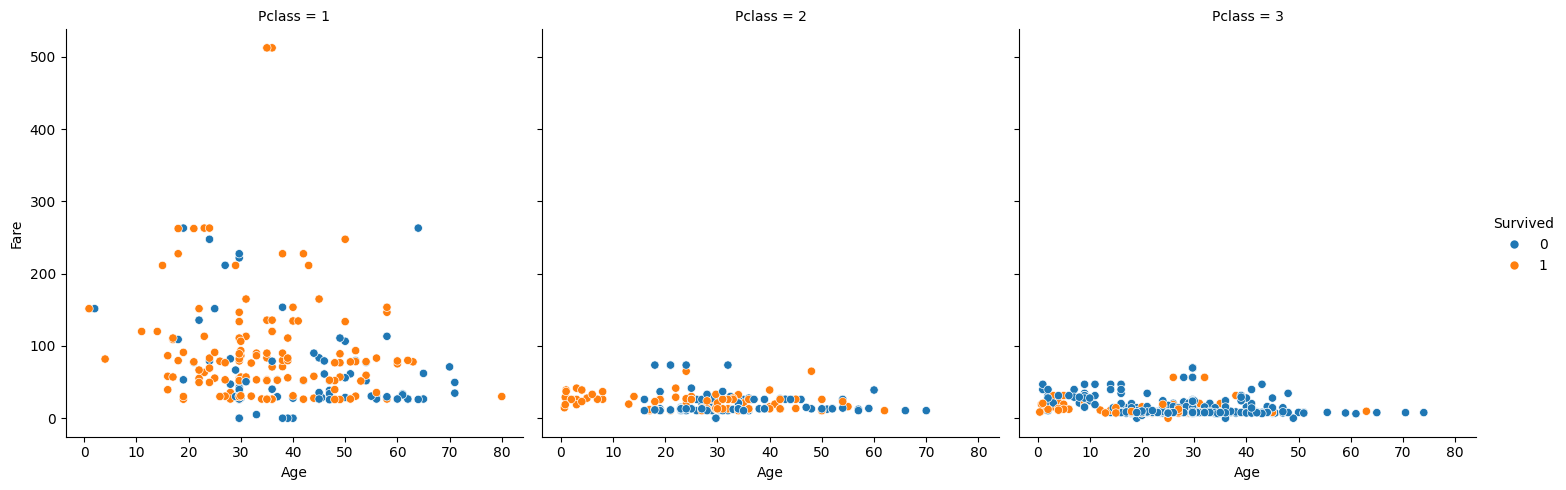

In [32]:
sns.relplot(data=train_df, x='Age', y='Fare', kind='scatter', hue='Survived', col='Pclass')

Age seems to be spread evenly across the three classes.

In [33]:
train_df['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

## Correlation Matrix using Seaborn

<Axes: >

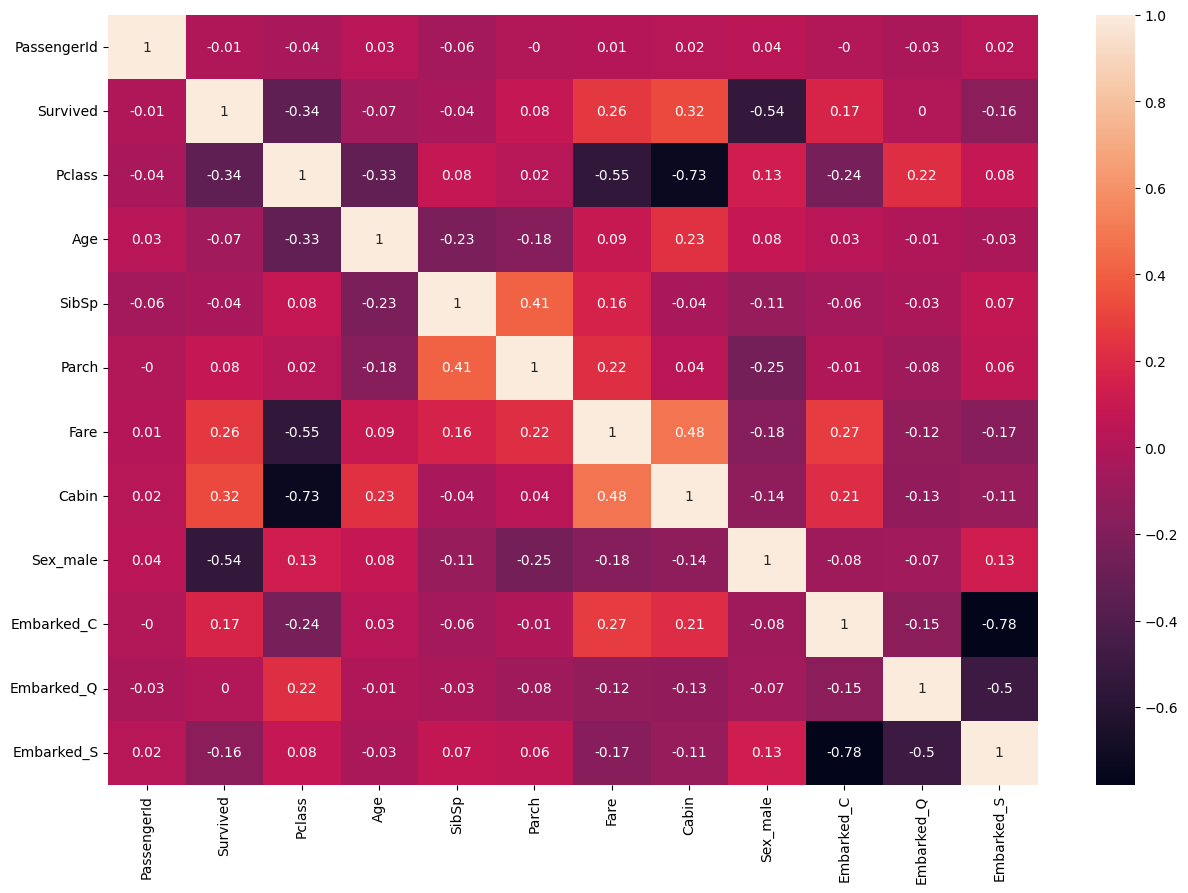

In [34]:
plt.figure(figsize = (15, 10))
correlation_matrix = train_df.corr().round(2)

# seaborn adds heatmap to visually highlight significant values in the matrix
sns.heatmap(data = correlation_matrix, annot = True)

Sex is most correlated with survival.  As is whether a person was assigned to a cabin.

SibSp is correlated with Parch, and we can assume that those travelling with siblings/spouses were also travelling with parents/children.  Therefore, I think keeping both of these attributes is not necessary.  One variable that counts any family members accompanying each person could be added, however due to the low correlation between either SibSp and Parch with survival, these two can simply be removed.  I will test with and without this Family attribute.  I may create another that simply states whether the passenger had family with them or not (1 or 0).

The three embarked columns do not appear to provide much information besides possibly indicating the class of the person.  Therefore, these will each be removed as I feel Pclass provides more/equal information.

Pclass is highly correlated with having a cabin as well as with the fare a person paid.  These three are correlated amongst themselves, as well as with Age.  Age was not highly correlated with survival.

C:\Users\charl\AppData\Local\Temp\ipykernel_14988\2542130025.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['Family'] = train_df['SibSp'] + train_df['Parch']
C:\Users\charl\AppData\Local\Temp\ipykernel_14988\2542130025.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['Family'] = (temp_df['Family'] > 0).astype('int')
C:\Users\charl\AppData\Local\Temp\ipykernel_14988\2542130025.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

<Axes: >

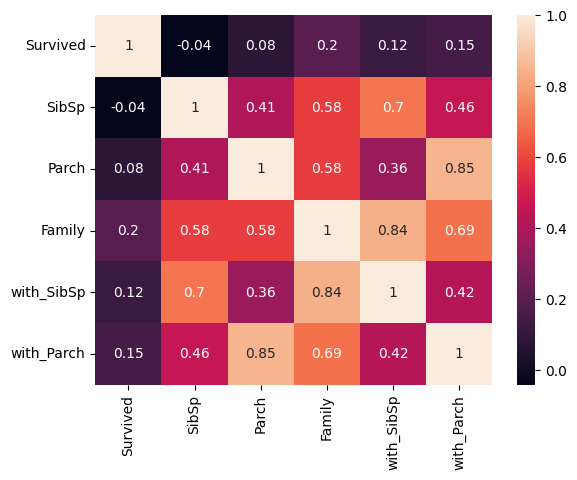

In [35]:
cols = ['Survived', 'SibSp', 'Parch']
temp_df = train_df[cols]
temp_df['Family'] = train_df['SibSp'] + train_df['Parch']
temp_df['Family'] = (temp_df['Family'] > 0).astype('int')
temp_df['with_SibSp'] = (temp_df['SibSp'] > 0).astype('int')
temp_df['with_Parch'] = (temp_df['Parch'] > 0).astype('int')
new_correlation_matrix = temp_df.corr().round(2)

# seaborn adds heatmap to visually highlight significant values in the matrix
sns.heatmap(data = new_correlation_matrix, annot = True)

From this, I will keep the Family attribute, but will drop the others. Not sure whether to drop Family too.

<Axes: >

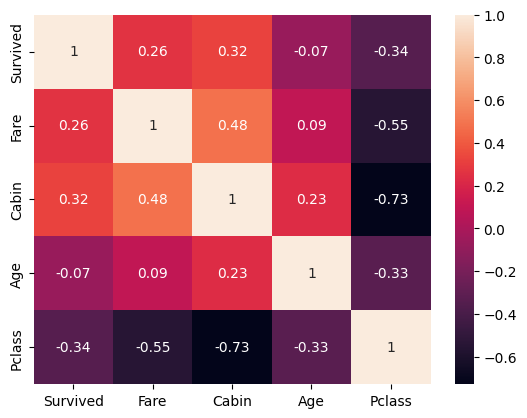

In [36]:
cols = ['Survived', 'Fare', 'Cabin', 'Age', 'Pclass']
temp_df = train_df[cols]
new_correlation_matrix = temp_df.corr().round(2)

# seaborn adds heatmap to visually highlight significant values in the matrix
sns.heatmap(data = new_correlation_matrix, annot = True)

From this, you can see that Pclass is very indicative of a person's age, the fare that they paid, and whether or not they were assigned to a cabin.

I am tempted to drop Cabin and Fare, and keep Pclass since this seems to provide as much information as the others.  Not sure what to do about Age yet.

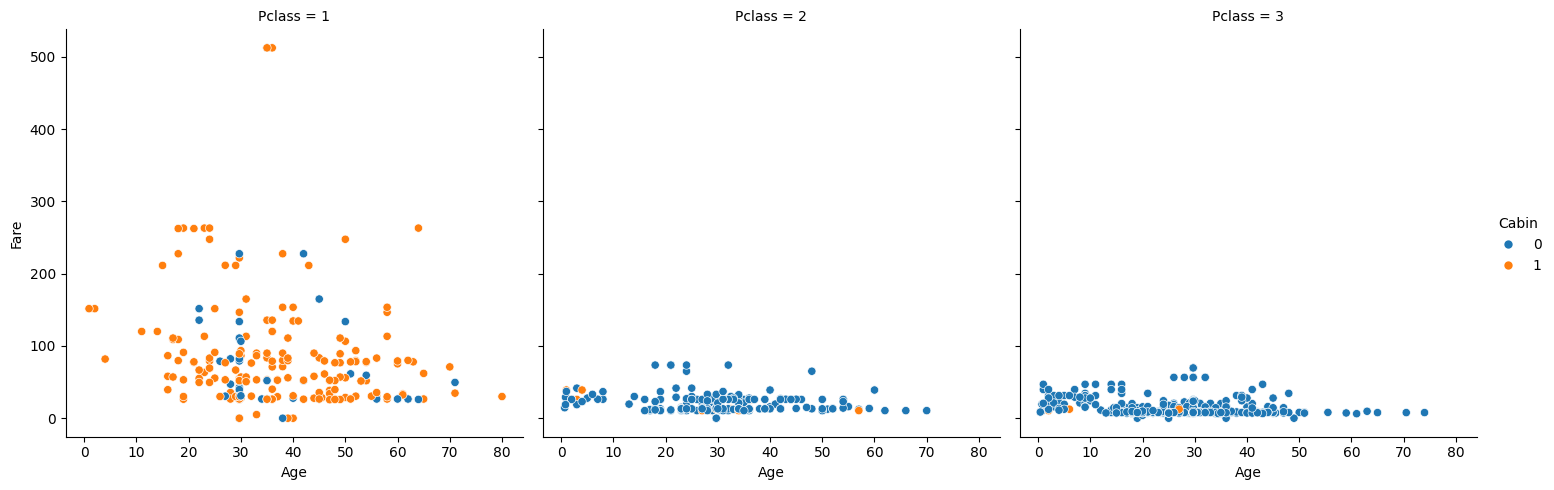

In [37]:
sns.relplot(data=train_df, x='Age' , y='Fare', hue='Cabin', col='Pclass')

It seems that Cabin is mostly indicative of whether a person was a first class passenger or not.  Therefore, I may drop cabin as Pclass will provide more information.

Did those that survived from 2nd and 3rd class have a cabin?

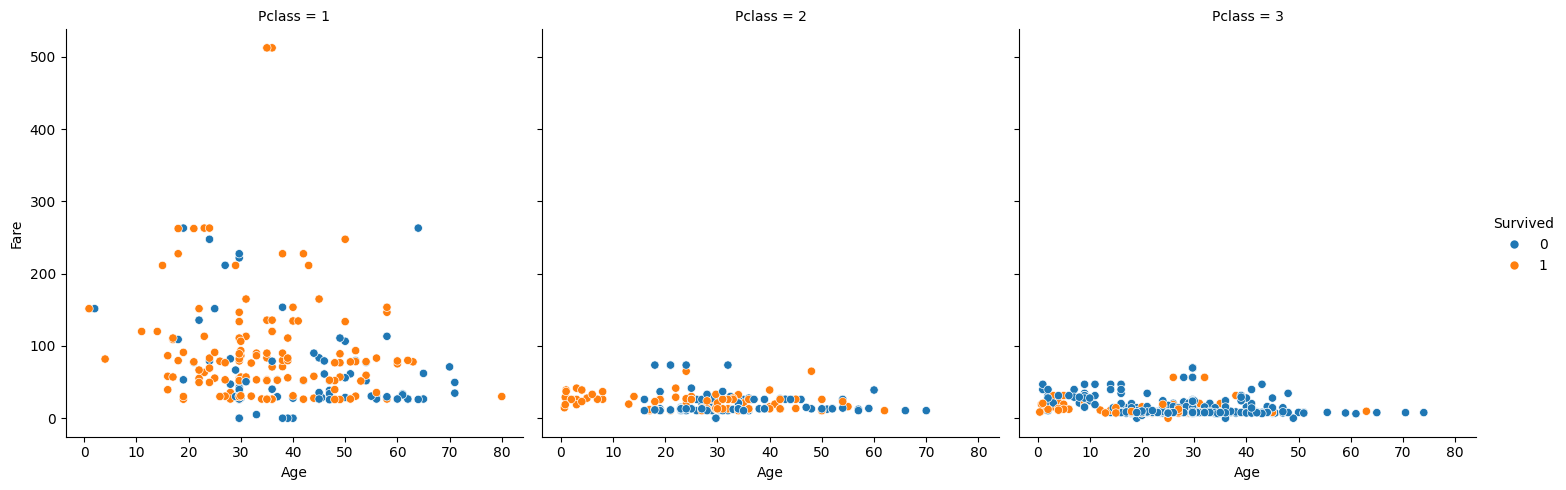

In [38]:
sns.relplot(data=train_df, x='Age' , y='Fare', hue='Survived', col='Pclass')

Cabin did not seem to relate to survival within the three classes

I will test the algorithm with the following:

Keep Fare, Cabin, and Pclass; Fare is kept, Pclass and Cabin are removed; Pclass is kept, Fare and Cabin are removed; Cabin is kept, Fare and Pclass are removed;

The fare attribute will be removed, as Pclass and cabin provide the same/similar information as fare.  Cabin will be kept for the time being due to its high correlation with survival.

In [39]:
i = ['Embarked_C']
port_C = train_df[train_df['Embarked_C'] != 0]
#port_C.drop(['Embarked_Q', 'Embarked_S'], axis=1, inplace=True)
port_C.head(10)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_male,Embarked_C,Embarked_Q,Embarked_S
1,2,1,1,38.000000,1,0,71.2833,1,0,1,0,0
9,10,1,2,14.000000,1,0,30.0708,0,0,1,0,0
19,20,1,3,29.699118,0,0,7.2250,0,0,1,0,0
26,27,0,3,29.699118,0,0,7.2250,0,1,1,0,0
30,31,0,1,40.000000,0,0,27.7208,0,1,1,0,0
31,32,1,1,29.699118,1,0,146.5208,1,0,1,0,0
34,35,0,1,28.000000,1,0,82.1708,0,1,1,0,0
36,37,1,3,29.699118,0,0,7.2292,0,1,1,0,0
39,40,1,3,14.000000,1,0,11.2417,0,0,1,0,0
42,43,0,3,29.699118,0,0,7.8958,0,1,1,0,0


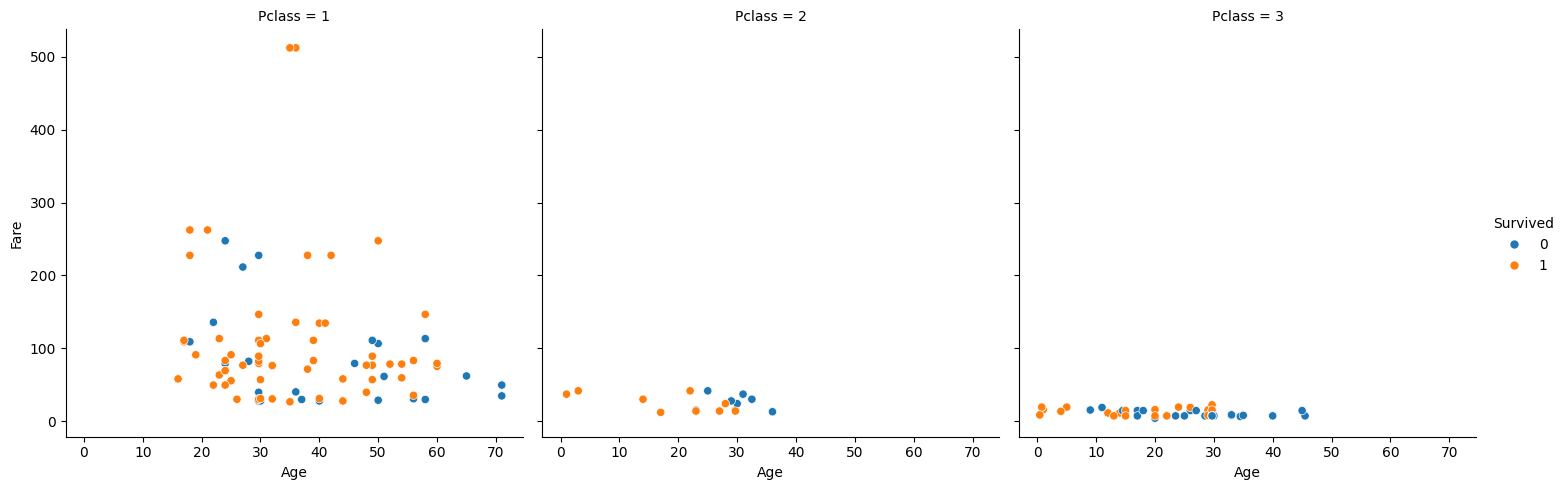

In [40]:
sns.relplot(data=port_C, x='Age', y='Fare', kind='scatter', hue='Survived', col='Pclass')

In [41]:
port_Q = train_df[train_df['Embarked_Q'] != 0]
port_S = train_df[train_df['Embarked_S'] != 0]

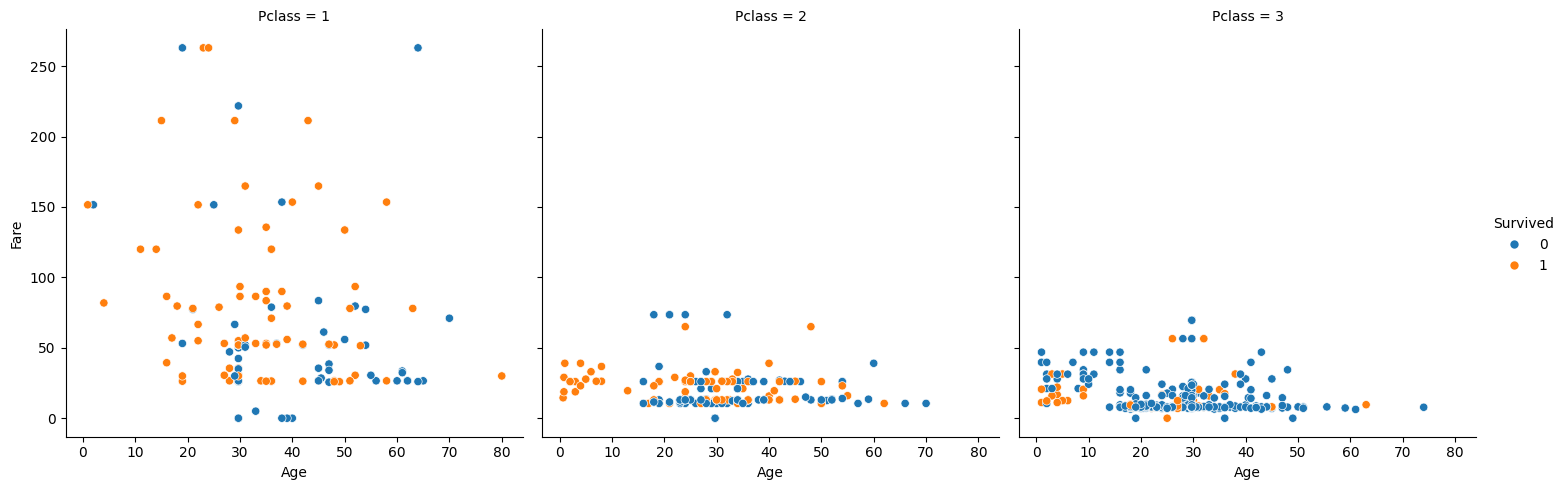

In [42]:
sns.relplot(data=port_S, x='Age', y='Fare', kind='scatter', hue='Survived', col='Pclass')

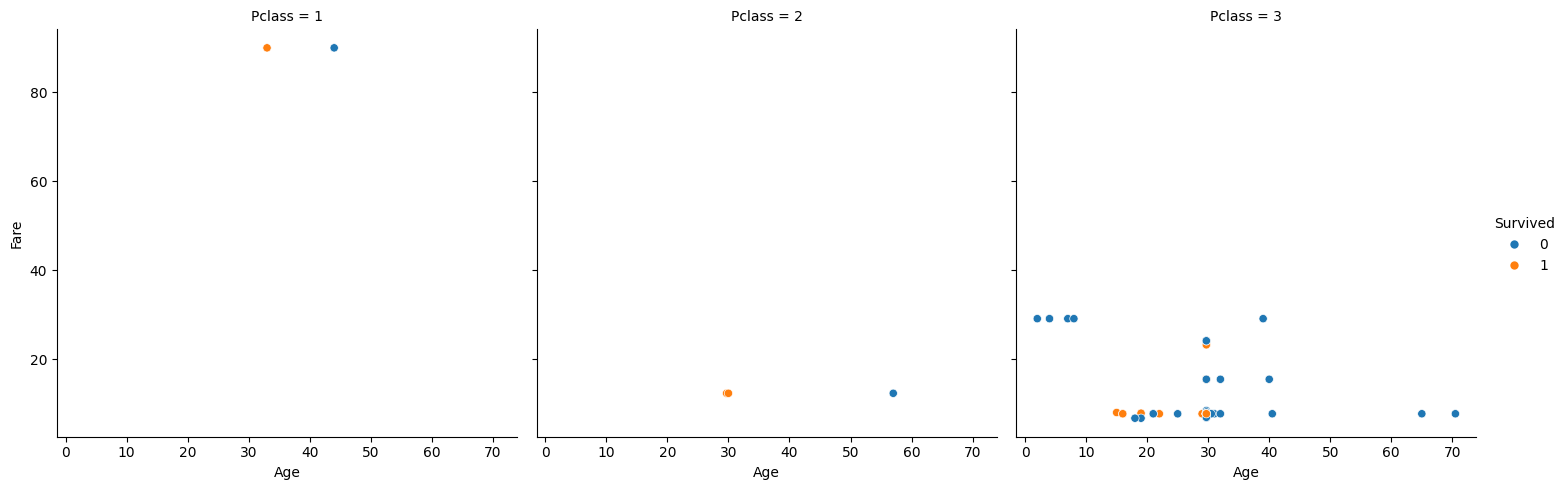

In [43]:
sns.relplot(data=port_Q, x='Age', y='Fare', kind='scatter', hue='Survived', col='Pclass')

Does not seem to give much information other than the numbers of people embarking at each port.

### Seaborn Pair Plot

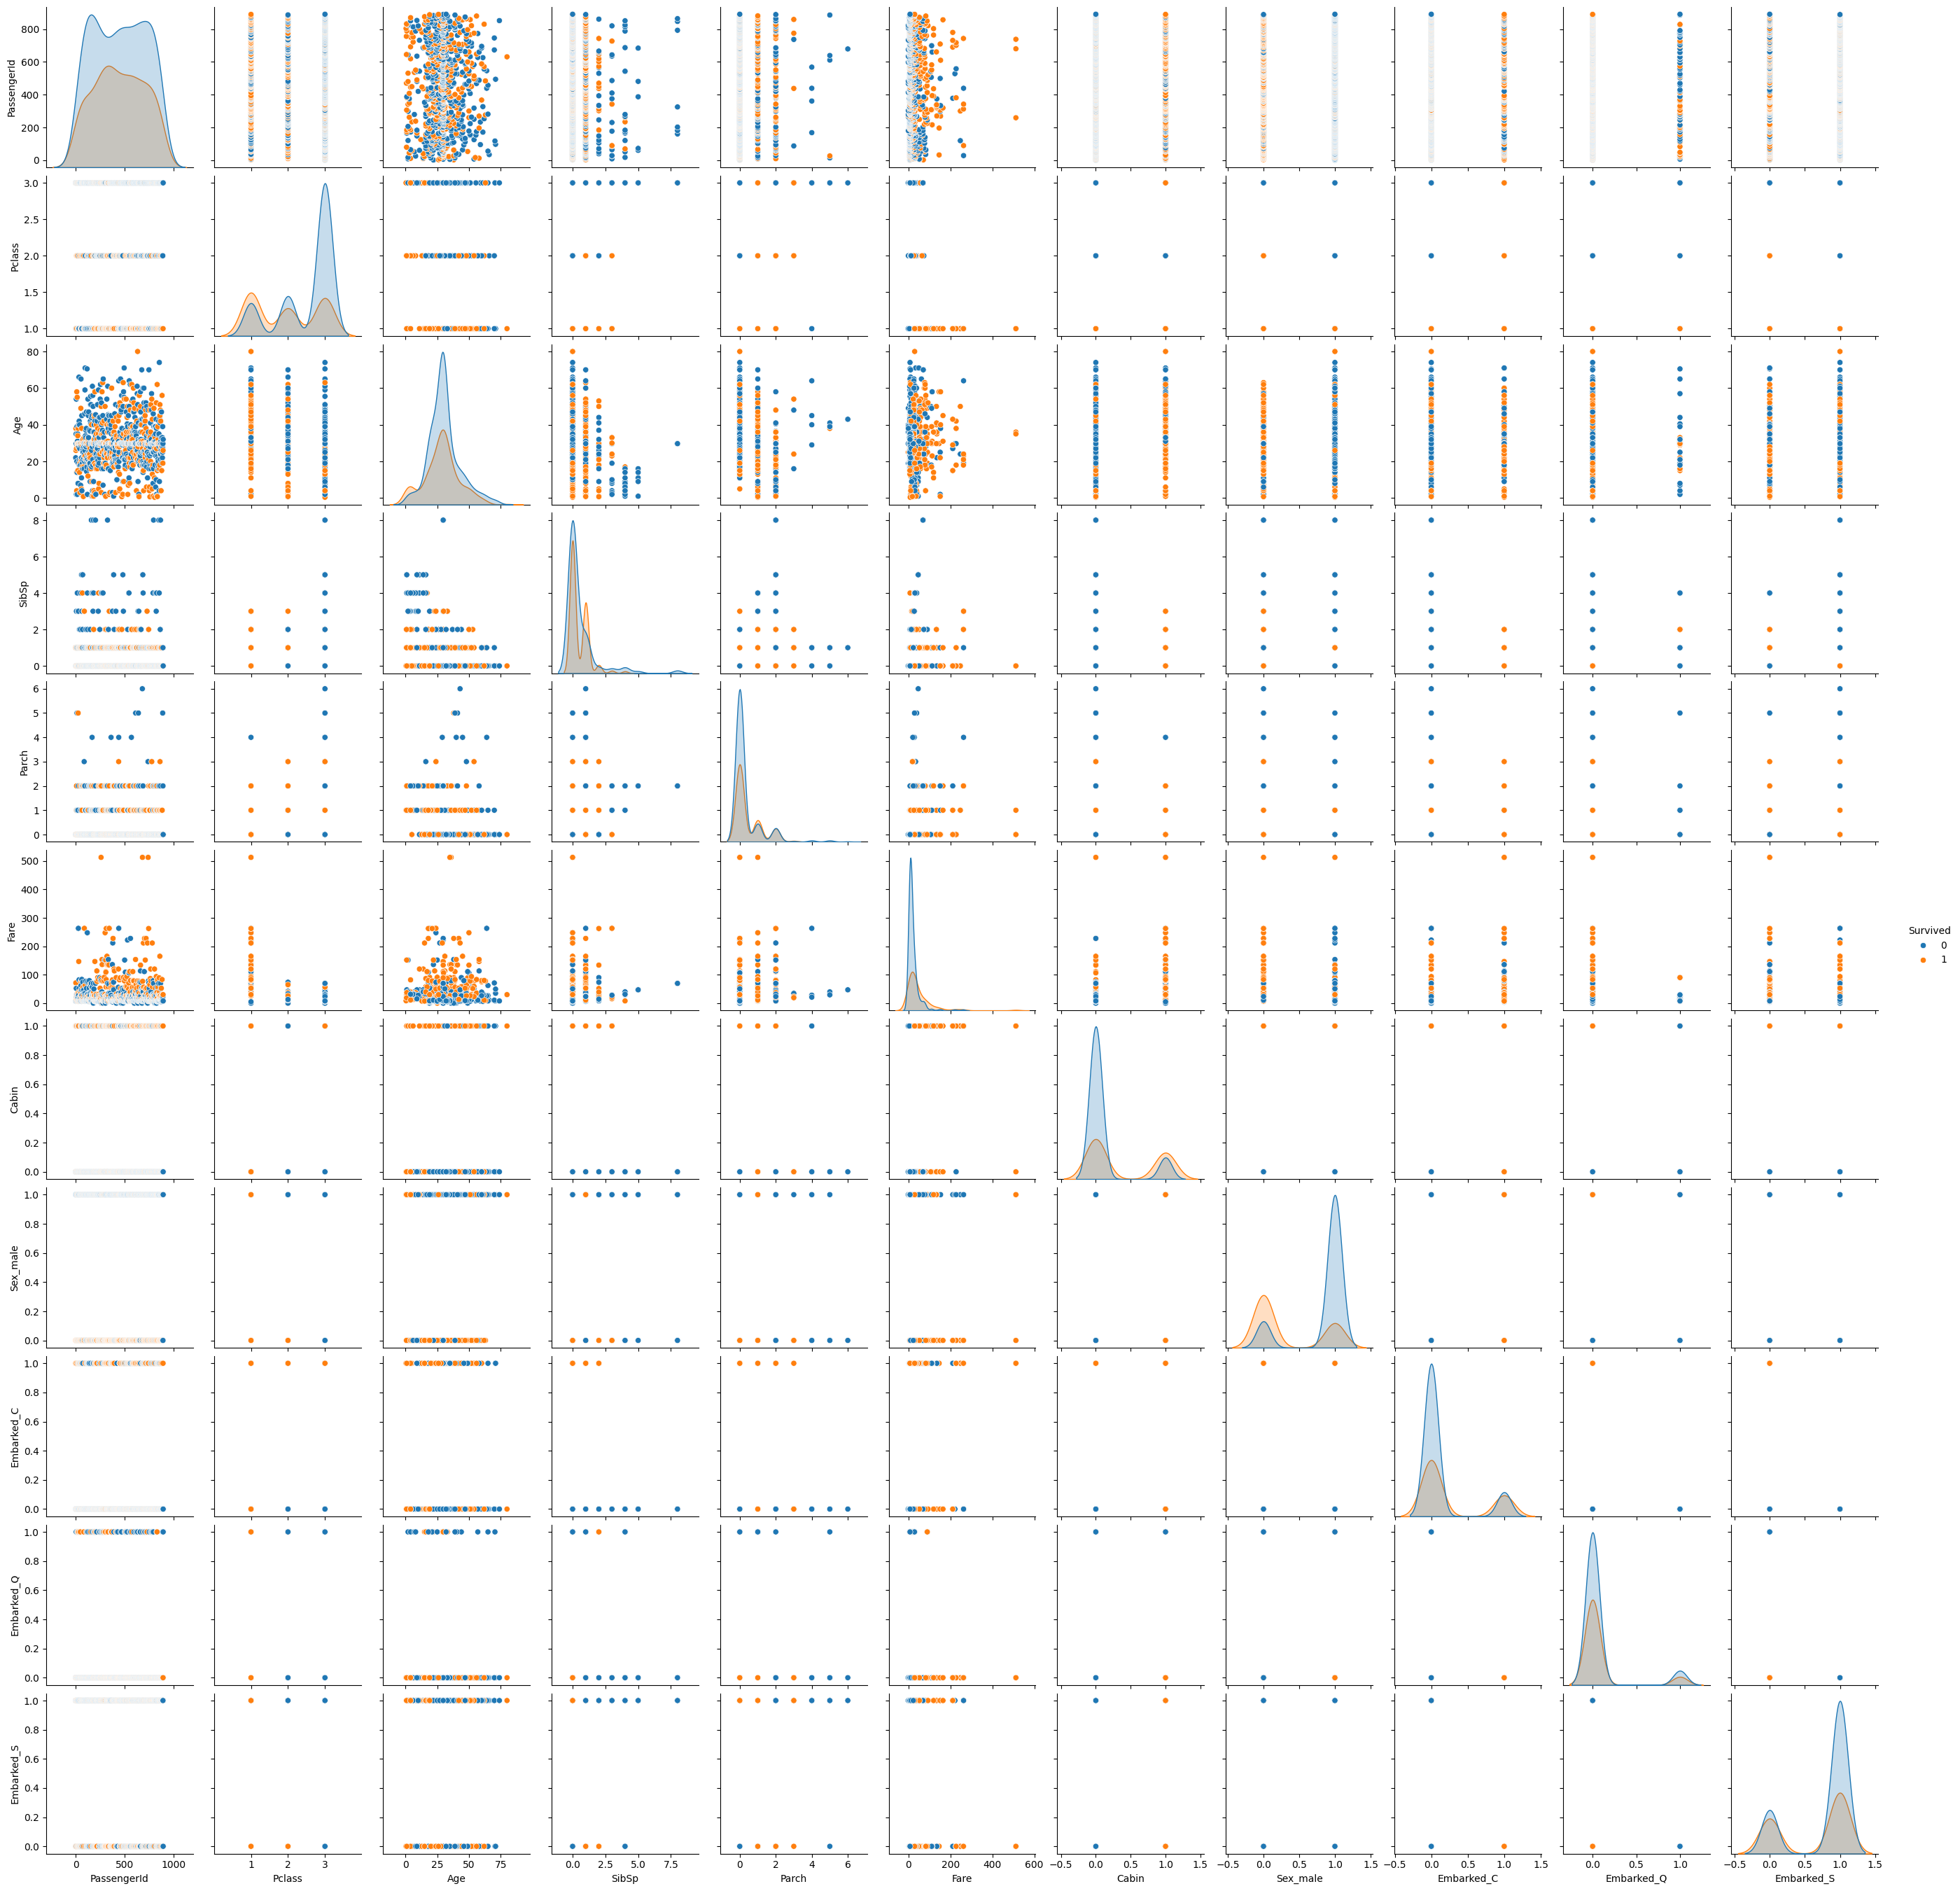

In [44]:
sns.pairplot(train_df, hue='Survived')

### Selecting features

In [45]:
train_df['Family_n'] = train_df['SibSp'] + train_df['Parch']

In [46]:
train_df['WithFamily'] = (train_df['Family_n']>0).astype('int')

In [47]:
train_df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Family_n,WithFamily
0,1,0,3,22.000000,1,0,7.2500,0,1,0,0,1,1,1
1,2,1,1,38.000000,1,0,71.2833,1,0,1,0,0,1,1
2,3,1,3,26.000000,0,0,7.9250,0,0,0,0,1,0,0
3,4,1,1,35.000000,1,0,53.1000,1,0,0,0,1,1,1
4,5,0,3,35.000000,0,0,8.0500,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0,1,0,0,1,0,0
887,888,1,1,19.000000,0,0,30.0000,1,0,0,0,1,0,0
888,889,0,3,29.699118,1,2,23.4500,0,0,0,0,1,3,1
889,890,1,1,26.000000,0,0,30.0000,1,1,1,0,0,0,0


In [48]:
feature_set_1 = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Sex_male'] # All features minus the embarked cols as they did not seem informative
feature_set_2 = ['Pclass', 'Age', 'Fare', 'Cabin', 'Sex_male', 'WithFamily'] # SibSp and Parch have been replaced with WithFamily
feature_set_3 = ['Pclass', 'Age', 'Sex_male', 'WithFamily'] # Cabin and Fare have been removed (Pclass does the job)
feature_set_4 = ['Age', 'Sex_male', 'Fare', 'WithFamily'] # Fare has replaced Pclass as they both provide similar information

In [49]:
feature_sets = [feature_set_1, feature_set_2, feature_set_3]

In [50]:
X = train_df[feature_set_1]
#X = train_df[feature_set_2]
#X = train_df[feature_set_3]

In [51]:
y = train_df['Survived']

### Setting up a train/test split

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_validate, y_train, y_validate = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

### Defining a function to evaluate models

This function takes a model defined elsewhere and fits the training data to the model.  It then makes predictions based on the validation data (X_validate).  It then compares the predicted values with the actual values (y_validate) and generates a Mean Average Error score for the model.

In [54]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, f1_score, accuracy_score
from sklearn.model_selection import cross_val_score

In [55]:
def model_score(my_model, X_train, X_validate, y_train, y_validate, X, y):
    my_model.fit(X_train, y_train)
    predictions = my_model.predict(X_validate)

    print(f"MAE for {my_model}: {mean_absolute_error(y_validate, predictions)}")
    print(f"RMSE for {my_model}: {root_mean_squared_error(y_validate, predictions)}")
    print(f"F1 for {my_model}: {f1_score(y_validate, predictions)}")
    print(f"Accuracy score for {my_model}: {accuracy_score(y_validate, predictions)}")
    
    scores = cross_val_score(my_model, X, y, cv=10)
    print(f"{scores.mean()} accuracy with a standard deviation of {scores.std()}")

### Defining the models

This problem requires supervised learning to predict a category, therefore a decision tree/random forest will be used.

#### Defining a decision tree

NOTE: to see the tree generated use plot_tree from sklearn tree

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
my_tree = DecisionTreeClassifier(random_state=0)

#### Defining a random forest model

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
my_forest = RandomForestClassifier(random_state=0)

### Evaluating the initial models

good to look at f1 and accuracy too

In [60]:
model_score(my_tree, X_train, X_validate, y_train, y_validate, X, y)

MAE for DecisionTreeClassifier(random_state=0): 0.20670391061452514
RMSE for DecisionTreeClassifier(random_state=0): 0.454647017602145
F1 for DecisionTreeClassifier(random_state=0): 0.7131782945736435
Accuracy score for DecisionTreeClassifier(random_state=0): 0.7932960893854749
0.7890886392009988 accuracy with a standard deviation of 0.06087307292710652


In [61]:
model_score(my_forest, X_train, X_validate, y_train, y_validate, X, y)

MAE for RandomForestClassifier(random_state=0): 0.18435754189944134
RMSE for RandomForestClassifier(random_state=0): 0.42936877145344576
F1 for RandomForestClassifier(random_state=0): 0.7441860465116279
Accuracy score for RandomForestClassifier(random_state=0): 0.8156424581005587
0.8103870162297129 accuracy with a standard deviation of 0.04903570120826553


### Finding best max leaf nodes of random forest model

In [62]:
max_leaf_n = [10, 50, 100, 150, 250, 500]

In [63]:
def test_max_leaf_n(max_leaf_n, X_train, X_validate, y_train, y_validate, X, y):
    for max_n in max_leaf_n:
        my_model = RandomForestClassifier(max_leaf_nodes=max_n, random_state=0)
        model_score(my_model, X_train, X_validate, y_train, y_validate, X, y)
        print()

In [64]:
test_max_leaf_n(max_leaf_n, X_train, X_validate, y_train, y_validate, X, y)

MAE for RandomForestClassifier(max_leaf_nodes=10, random_state=0): 0.20670391061452514
RMSE for RandomForestClassifier(max_leaf_nodes=10, random_state=0): 0.454647017602145
F1 for RandomForestClassifier(max_leaf_nodes=10, random_state=0): 0.6991869918699187
Accuracy score for RandomForestClassifier(max_leaf_nodes=10, random_state=0): 0.7932960893854749
0.8048189762796504 accuracy with a standard deviation of 0.059826182414456884

MAE for RandomForestClassifier(max_leaf_nodes=50, random_state=0): 0.1787709497206704
RMSE for RandomForestClassifier(max_leaf_nodes=50, random_state=0): 0.422813138065352
F1 for RandomForestClassifier(max_leaf_nodes=50, random_state=0): 0.7419354838709677
Accuracy score for RandomForestClassifier(max_leaf_nodes=50, random_state=0): 0.8212290502793296
0.8249812734082397 accuracy with a standard deviation of 0.05340672947000913

MAE for RandomForestClassifier(max_leaf_nodes=100, random_state=0): 0.16759776536312848
RMSE for RandomForestClassifier(max_leaf_nodes

100 Max Leaf Nodes appears to have the best scores- will test with intervals between 50 and 100

In [65]:
max_leaf_n = [60, 70, 80, 90, 100]

In [66]:
test_max_leaf_n(max_leaf_n, X_train, X_validate, y_train, y_validate, X, y)

MAE for RandomForestClassifier(max_leaf_nodes=60, random_state=0): 0.1787709497206704
RMSE for RandomForestClassifier(max_leaf_nodes=60, random_state=0): 0.422813138065352
F1 for RandomForestClassifier(max_leaf_nodes=60, random_state=0): 0.7419354838709677
Accuracy score for RandomForestClassifier(max_leaf_nodes=60, random_state=0): 0.8212290502793296
0.8283520599250936 accuracy with a standard deviation of 0.0506851180253512

MAE for RandomForestClassifier(max_leaf_nodes=70, random_state=0): 0.1787709497206704
RMSE for RandomForestClassifier(max_leaf_nodes=70, random_state=0): 0.422813138065352
F1 for RandomForestClassifier(max_leaf_nodes=70, random_state=0): 0.746031746031746
Accuracy score for RandomForestClassifier(max_leaf_nodes=70, random_state=0): 0.8212290502793296
0.8261048689138576 accuracy with a standard deviation of 0.0507465206599197

MAE for RandomForestClassifier(max_leaf_nodes=80, random_state=0): 0.1787709497206704
RMSE for RandomForestClassifier(max_leaf_nodes=80, ra

100 trees still performs best.

MAE for RandomForestClassifier(max_leaf_nodes=100, random_state=0): 0.16759776536312848

RMSE for RandomForestClassifier(max_leaf_nodes=100, random_state=0): 0.40938706057120133

F1 for RandomForestClassifier(max_leaf_nodes=100, random_state=0): 0.7619047619047619

Accuracy score for RandomForestClassifier(max_leaf_nodes=100, random_state=0): 0.8324022346368715

0.8238576779026218 accuracy with a standard deviation of 0.0484158420272279

### Looking at number of trees in the forest

In [67]:
n_trees = [10,50,100,150,200,500]

In [68]:
def test_max_tree_n(n_trees, X_train, X_validate, y_train, y_validate, X, y):
    for n in n_trees:
        my_model = RandomForestClassifier(max_leaf_nodes=100, n_estimators=n, random_state=0)
        model_score(my_model, X_train, X_validate, y_train, y_validate, X, y)
        print()

In [69]:
test_max_tree_n(n_trees, X_train, X_validate, y_train, y_validate, X, y)

MAE for RandomForestClassifier(max_leaf_nodes=100, n_estimators=10, random_state=0): 0.17318435754189945
RMSE for RandomForestClassifier(max_leaf_nodes=100, n_estimators=10, random_state=0): 0.41615424729527806
F1 for RandomForestClassifier(max_leaf_nodes=100, n_estimators=10, random_state=0): 0.7559055118110236
Accuracy score for RandomForestClassifier(max_leaf_nodes=100, n_estimators=10, random_state=0): 0.8268156424581006
0.8249438202247191 accuracy with a standard deviation of 0.04226212979962203

MAE for RandomForestClassifier(max_leaf_nodes=100, n_estimators=50, random_state=0): 0.16201117318435754
RMSE for RandomForestClassifier(max_leaf_nodes=100, n_estimators=50, random_state=0): 0.4025061157105039
F1 for RandomForestClassifier(max_leaf_nodes=100, n_estimators=50, random_state=0): 0.7716535433070866
Accuracy score for RandomForestClassifier(max_leaf_nodes=100, n_estimators=50, random_state=0): 0.8379888268156425
0.8294756554307116 accuracy with a standard deviation of 0.043362

50 trees appears to perform best when testing with the default max_leaf_nodes.  When testing with max_leaf_nodes=100, 200 trees is the best.  Going to use n_estimators=200

MAE for RandomForestClassifier(max_leaf_nodes=100, n_estimators=200, random_state=0): 0.16759776536312848

RMSE for RandomForestClassifier(max_leaf_nodes=100, n_estimators=200, random_state=0): 0.40938706057120133

F1 for RandomForestClassifier(max_leaf_nodes=100, n_estimators=200, random_state=0): 0.765625

Accuracy score for RandomForestClassifier(max_leaf_nodes=100, n_estimators=200, random_state=0): 0.8324022346368715

0.8328339575530587 accuracy with a standard deviation of 0.0461465171496399

### Looking at max_depth of random forest

In [70]:
def test_max_depth(depths, X_train, X_validate, y_train, y_validate, X, y):
    for d in depths:
        my_model = RandomForestClassifier(n_estimators=200, max_leaf_nodes=100, max_depth=d, random_state=0)
        model_score(my_model, X_train, X_validate, y_train, y_validate, X, y)
        print()

In [71]:
depths = [10, 50, 100, 150, 200, 250, 500]

In [72]:
test_max_depth(depths, X_train, X_validate, y_train, y_validate, X, y)

MAE for RandomForestClassifier(max_depth=10, max_leaf_nodes=100, n_estimators=200,
                       random_state=0): 0.17318435754189945
RMSE for RandomForestClassifier(max_depth=10, max_leaf_nodes=100, n_estimators=200,
                       random_state=0): 0.41615424729527806
F1 for RandomForestClassifier(max_depth=10, max_leaf_nodes=100, n_estimators=200,
                       random_state=0): 0.752
Accuracy score for RandomForestClassifier(max_depth=10, max_leaf_nodes=100, n_estimators=200,
                       random_state=0): 0.8268156424581006
0.830561797752809 accuracy with a standard deviation of 0.044346593738585224

MAE for RandomForestClassifier(max_depth=50, max_leaf_nodes=100, n_estimators=200,
                       random_state=0): 0.16759776536312848
RMSE for RandomForestClassifier(max_depth=50, max_leaf_nodes=100, n_estimators=200,
                       random_state=0): 0.40938706057120133
F1 for RandomForestClassifier(max_depth=50, max_leaf_nodes=100, n_e

10 performs best when testing with the defaults.  When testing with max_leaf_nodes=100 and n_estimators=200, then the max_depth starts to improve scores from about 50 onwards.

In [73]:
depths = [10, 20, 30, 40, 50]

In [74]:
test_max_depth(depths, X_train, X_validate, y_train, y_validate, X, y)

MAE for RandomForestClassifier(max_depth=10, max_leaf_nodes=100, n_estimators=200,
                       random_state=0): 0.17318435754189945
RMSE for RandomForestClassifier(max_depth=10, max_leaf_nodes=100, n_estimators=200,
                       random_state=0): 0.41615424729527806
F1 for RandomForestClassifier(max_depth=10, max_leaf_nodes=100, n_estimators=200,
                       random_state=0): 0.752
Accuracy score for RandomForestClassifier(max_depth=10, max_leaf_nodes=100, n_estimators=200,
                       random_state=0): 0.8268156424581006
0.830561797752809 accuracy with a standard deviation of 0.044346593738585224

MAE for RandomForestClassifier(max_depth=20, max_leaf_nodes=100, n_estimators=200,
                       random_state=0): 0.16759776536312848
RMSE for RandomForestClassifier(max_depth=20, max_leaf_nodes=100, n_estimators=200,
                       random_state=0): 0.40938706057120133
F1 for RandomForestClassifier(max_depth=20, max_leaf_nodes=100, n_e

A max_depth of 20 seems to perform slightly better, and is still a relatively low number.  I do not want to increase depth too much due to the small number of features.

MAE for RandomForestClassifier(max_depth=20, max_leaf_nodes=100, n_estimators=200, random_state=0): 0.16759776536312848

RMSE for RandomForestClassifier(max_depth=20, max_leaf_nodes=100, n_estimators=200, random_state=0): 0.40938706057120133

F1 for RandomForestClassifier(max_depth=20, max_leaf_nodes=100, n_estimators=200, random_state=0): 0.765625

Accuracy score for RandomForestClassifier(max_depth=20, max_leaf_nodes=100, n_estimators=200, random_state=0): 0.8324022346368715

0.8328339575530587 accuracy with a standard deviation of 0.04447476837278212

### Feature importance

In [75]:
forest_clf = RandomForestClassifier(max_leaf_nodes=100, max_depth=20, n_estimators=200, random_state=0)

In [76]:
forest_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, max_leaf_nodes=100, n_estimators=200,
                       random_state=0)

In [77]:
feature_imp = pd.DataFrame(forest_clf.feature_importances_, index=feature_set_1)

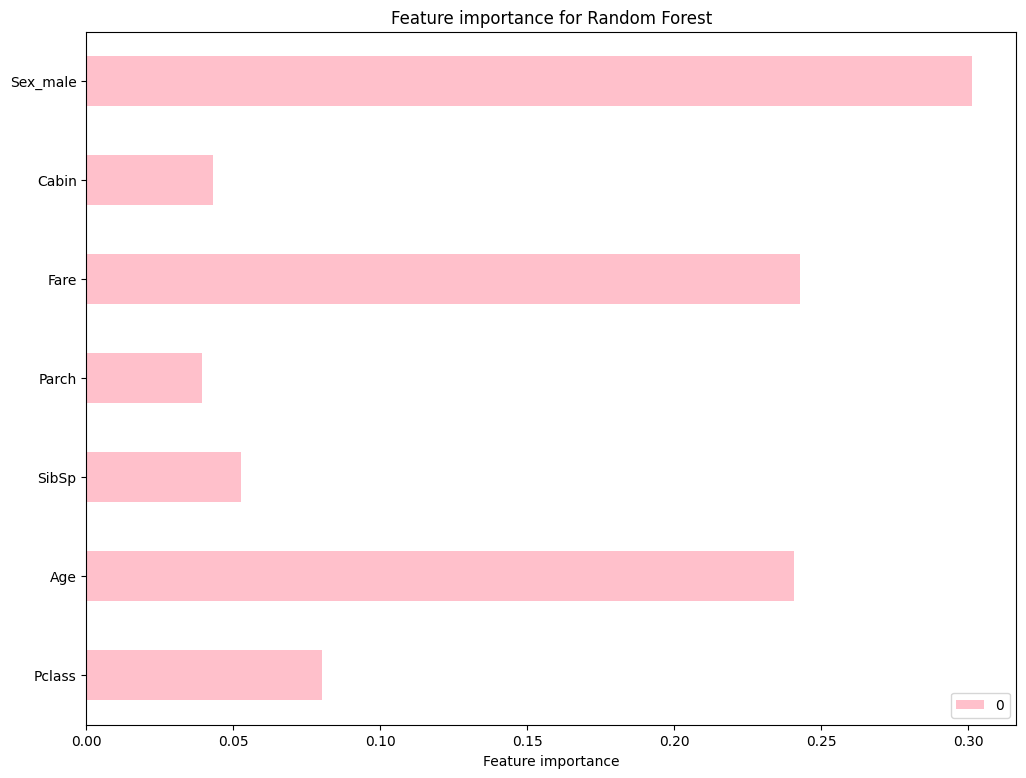

In [78]:
feature_imp.plot(kind='barh', figsize=(12,9), color = 'pink')
plt.xlabel('Feature importance')
plt.title('Feature importance for Random Forest')
plt.show()

The most important features seem to be Sex_male, Fare, and Age.

### Scoring the tree with different feature sets

In [79]:
X = train_df[feature_set_2]
X_train, X_validate, y_train, y_validate = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [80]:
model_score(forest_clf, X_train, X_validate, y_train, y_validate, X, y)

MAE for RandomForestClassifier(max_depth=20, max_leaf_nodes=100, n_estimators=200,
                       random_state=0): 0.17318435754189945
RMSE for RandomForestClassifier(max_depth=20, max_leaf_nodes=100, n_estimators=200,
                       random_state=0): 0.41615424729527806
F1 for RandomForestClassifier(max_depth=20, max_leaf_nodes=100, n_estimators=200,
                       random_state=0): 0.752
Accuracy score for RandomForestClassifier(max_depth=20, max_leaf_nodes=100, n_estimators=200,
                       random_state=0): 0.8268156424581006
0.8328089887640449 accuracy with a standard deviation of 0.034393036350038625


In [81]:
X = train_df[feature_set_3]
X_train, X_validate, y_train, y_validate = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [82]:
model_score(forest_clf, X_train, X_validate, y_train, y_validate, X, y)

MAE for RandomForestClassifier(max_depth=20, max_leaf_nodes=100, n_estimators=200,
                       random_state=0): 0.18994413407821228
RMSE for RandomForestClassifier(max_depth=20, max_leaf_nodes=100, n_estimators=200,
                       random_state=0): 0.43582580703557733
F1 for RandomForestClassifier(max_depth=20, max_leaf_nodes=100, n_estimators=200,
                       random_state=0): 0.7424242424242424
Accuracy score for RandomForestClassifier(max_depth=20, max_leaf_nodes=100, n_estimators=200,
                       random_state=0): 0.8100558659217877
0.8081273408239701 accuracy with a standard deviation of 0.03677591770047048


In [83]:
X = train_df[feature_set_4]
X_train, X_validate, y_train, y_validate = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [84]:
model_score(forest_clf, X_train, X_validate, y_train, y_validate, X, y)

MAE for RandomForestClassifier(max_depth=20, max_leaf_nodes=100, n_estimators=200,
                       random_state=0): 0.1787709497206704
RMSE for RandomForestClassifier(max_depth=20, max_leaf_nodes=100, n_estimators=200,
                       random_state=0): 0.422813138065352
F1 for RandomForestClassifier(max_depth=20, max_leaf_nodes=100, n_estimators=200,
                       random_state=0): 0.75
Accuracy score for RandomForestClassifier(max_depth=20, max_leaf_nodes=100, n_estimators=200,
                       random_state=0): 0.8212290502793296
0.8103745318352061 accuracy with a standard deviation of 0.04673882698646309


Feature set 2 performed better than feature set 3 and 4, and also better than feature set 1.

In [85]:
feature_set_5 = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male'] # feature set 1 without Cabin
feature_set_6 = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Sex_male', 'Embarked_C', 'Embarked_S', 'Embarked_Q'] # all original features

In [86]:
X = train_df[feature_set_5]
X_train, X_validate, y_train, y_validate = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)
model_score(forest_clf, X_train, X_validate, y_train, y_validate, X, y)

MAE for RandomForestClassifier(max_depth=20, max_leaf_nodes=100, n_estimators=200,
                       random_state=0): 0.1564245810055866
RMSE for RandomForestClassifier(max_depth=20, max_leaf_nodes=100, n_estimators=200,
                       random_state=0): 0.3955054753168236
F1 for RandomForestClassifier(max_depth=20, max_leaf_nodes=100, n_estimators=200,
                       random_state=0): 0.7777777777777778
Accuracy score for RandomForestClassifier(max_depth=20, max_leaf_nodes=100, n_estimators=200,
                       random_state=0): 0.8435754189944135
0.8328589263420725 accuracy with a standard deviation of 0.053353949640707804


In [87]:
X = train_df[feature_set_6]
X_train, X_validate, y_train, y_validate = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)
model_score(forest_clf, X_train, X_validate, y_train, y_validate, X, y)

MAE for RandomForestClassifier(max_depth=20, max_leaf_nodes=100, n_estimators=200,
                       random_state=0): 0.1564245810055866
RMSE for RandomForestClassifier(max_depth=20, max_leaf_nodes=100, n_estimators=200,
                       random_state=0): 0.3955054753168236
F1 for RandomForestClassifier(max_depth=20, max_leaf_nodes=100, n_estimators=200,
                       random_state=0): 0.78125
Accuracy score for RandomForestClassifier(max_depth=20, max_leaf_nodes=100, n_estimators=200,
                       random_state=0): 0.8435754189944135
0.8283270911360798 accuracy with a standard deviation of 0.040911513186810286


Feature sets 1, 5 and 6 performed best

feature_set_1 = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Sex_male'] # All features minus the embarked cols as they did not seem informative

feature_set_5 = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male'] # feature set 1 without Cabin

feature_set_6 = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Sex_male', 'Embarked_C', 'Embarked_S', 'Embarked_Q'] # all original features

## Testing the model with test.csv

In [88]:
test_df = pd.read_csv('test.csv')

In [89]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [90]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [91]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Applying the same cleaning to the test df

In [92]:
test_df.drop(['Name', 'Ticket'], axis=1, inplace=True)
test_df['Cabin'] = test_df['Cabin'].notnull().astype('int')
test_df = pd.get_dummies(test_df, columns=['Sex'], drop_first=True, dtype='int')
test_df = pd.get_dummies(test_df, columns=['Embarked'], drop_first=False, dummy_na=False, dtype='int')
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())

In [93]:
test_df

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,0,1,0,1,0
1,893,3,47.0,1,0,7.0000,0,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,0,1,0
3,895,3,27.0,0,0,8.6625,0,1,0,0,1
4,896,3,22.0,1,1,12.2875,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,NaN,0,0,8.0500,0,1,0,0,1
414,1306,1,39.0,0,0,108.9000,1,0,1,0,0
415,1307,3,38.5,0,0,7.2500,0,1,0,0,1
416,1308,3,NaN,0,0,8.0500,0,1,0,0,1


### Testing/predicting with forest_clf trained on feature_set_6

Using the forest classifier that was trained using feature set 6 to make the predictions for the data from test.csv

In [94]:
test_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Sex_male', 'Embarked_C', 'Embarked_S', 'Embarked_Q']

In [95]:
X = test_df[test_features]

In [96]:
test_predictions = forest_clf.predict(X)

In [97]:
test_df['Survived'] = test_predictions

In [98]:
submission_cols = ['PassengerId', 'Survived']
submission = test_df[submission_cols]

In [99]:
submission # 0.77

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [100]:
submission.to_csv('Titanic_Submission.csv', index=False)